# HANDS-ON 01

2023-03-31

Considerations:

- Range $[-1,2]$ to search for a specific root value
- Precision $ \ \varepsilon = 1 \cdot 10^{-6}$
- 50 iterations

## Newton-Raphson method

The Newton-Raphson method is simple and fast, but has the disadvantage of needing the derivative $f(x)$ of the function. Using the library [SymPy](https://www.sympy.org/en/index.html) it is possible to find the derivative in an automated way for many functions, but this is not always possible, meaning that the method is not always applicable.

The formula used in the Newton-Raphson method is derived from the Taylor series expansion, and is given by the equation:

$$x_{i+1} = x_{i} - \frac {f(x_i)} {f'(x_i)} $$

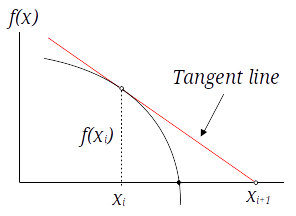

The formula approximates $f(x)$ by the straight line that is tangent to the curve at $x_i$, so $x_{i+1}$ is at the intersection of the x-axis and the tangent line. 

Let's call $dx$ the term $- \frac {f(x_i)} {f'(x_i)}$ from the previous equation.

The algorithm repeatedly applies the equation, starting from an initial value $x = \frac 1 2 (x_1 + x_2)$  until the convergence criterion $|x_{i+1}-x_i| < \varepsilon$ is reached, where $\varepsilon$ is the error tolerance. At each iteration if the signs of $f(x1)$ and $f(x)$ are the same, $x_1$ receives the value $x$, otherwise $x_2$ receives the value of $x$. Then $f'(x)$ is calculated, and if it is zero, $dx = (x_2 - x_1)$. Otherwise $dx = - \frac {f(x_i)} {f'(x_i)}$. Then the next $x$ is calculated as $x = x_1 + dx$. The number of iterations in the algorithm is limited to a certain value, so that the elapsed time does not extend too much in special cases.

## Code

The [SymPy](https://www.sympy.org/en/index.html) library was used to solve the differential equation for each function used. It was also used for the calculation of $f'(x)$, given the value of $x$, a scalar number. For future work, a possible optimization would be to manually insert the differential equation obtained, into the code.

In [67]:
import numpy as np, math as mt, matplotlib.pyplot as plt
import sympy as sp
from sympy import cos

Equations:

In [68]:
u1_expr = "x - cos(x)"
sx1 = sp.symbols('x')
su1 = sp.sympify(u1_expr)
sdu1 = sp.diff(su1, sx1)
print(f"Equation:   {su1}")
print(f"Derivative: {sdu1}")


def f1(x):
    return float(su1.subs(sx1, x))


def df1(x):
    return float(sdu1.subs(sx1, x))


def f1_plt(x):
    return x - np.cos(x)

Equation:   x - cos(x)
Derivative: sin(x) + 1


In [69]:
u2_expr = "x**3 - 9.0 * x**2 + 5.0"
sx2 = sp.symbols('x')
su2 = sp.sympify(u2_expr)
sdu2 = sp.diff(su2, sx2)
print(f"Equation:   {su2}")
print(f"Derivative: {sdu2}")


def f2(x):
    return float(su2.subs(sx2, x))


def df2(x):
    return float(sdu2.subs(sx2, x))


def f2_plt(x):
    return x**3 - 9.0 * x**2 + 5.0

Equation:   x**3 - 9.0*x**2 + 5.0
Derivative: 3*x**2 - 18.0*x


In [70]:
u3_expr = "x * (3 - x**2) / 2.0"
sx3 = sp.symbols('x')
su3 = sp.sympify(u3_expr)
sdu3 = sp.diff(su3, sx3)
print(f"Equation:   {su3}")
print(f"Derivative: {sdu3}")


def f3(x):
    return float(su3.subs(sx3, x))


def df3(x):
    return float(sdu3.subs(sx3, x))


def f3_plt(x):
    return x * (3 - x**2) / 2.0

Equation:   0.5*x*(3 - x**2)
Derivative: 1.5 - 1.5*x**2


In [71]:
u4_expr = "(x**4 - 10 * x**2) * exp(-x) + 1"
sx4 = sp.symbols('x')
su4 = sp.sympify(u4_expr)
sdu4 = sp.diff(su4, sx4)
print(f"Equation:   {su4}")
print(f"Derivative: {sdu4}")


def f4(x):
    return float(su4.subs(sx4, x))


def df4(x):
    return float(sdu4.subs(sx4, x))


def f4_plt(x):
    return (x**4 - 10 * x**2) * np.exp(-x) + 1

Equation:   (x**4 - 10*x**2)*exp(-x) + 1
Derivative: (4*x**3 - 20*x)*exp(-x) - (x**4 - 10*x**2)*exp(-x)


In [72]:
u5_expr = "4 * pi * x - 400 * x**(-2)"
sx5 = sp.symbols('x')
su5 = sp.sympify(u5_expr)
sdu5 = sp.diff(su5, sx5)
print(f"Equation:   {su5}")
print(f"Derivative: {sdu5}")


def f5(x):
    return float(su5.subs(sx5, x))


def df5(x):
    return float(sdu5.subs(sx5, x))


def f5_plt(x):
    return (4 * np.pi * x) - (400 * x**-2)

Equation:   4*pi*x - 400/x**2
Derivative: 4*pi + 800/x**3


In [73]:
def raphson(f, df, x1, x2, tol):
    fx1 = f(x1)
    if fx1 == 0.0:
        return x1
    fx2 = f(x2)
    if fx2 == 0.0:
        return x2
    x = 0.5 * (x1 + x2)
    a = np.empty(0)
    b = np.empty(0)
    print(f" i     x        f(x)       x1        x2")
    print(f"---  -------   -------   -------   -------")
    for i in range(50):
        fx = f(x)
        print(f"{i:2}:  {x:+#.4f},  {fx:+#.4f},  {x1:+#.4f},  {x2:+#.4f}")
        a = np.append(a, x)
        b = np.append(b, fx)
        if fx == 0.0:
            print(f"\nSolution:  x = {x:+#.4f},  f(x) = {f(x):+#.4f}\n")
            return a, b
        # Tighten the brackets on the root
        if np.sign(fx1) != np.sign(fx):
            x2 = x
        else:
            x1 = x
        # Try a Newton-Raphson step
        dfx = df(x)
        # If division by zero, push x out of bounds
        try:
            dx = -fx / dfx
        except ZeroDivisionError:
            dx = x2 - x1
        x = x + dx
        # If the result is outside the brackets, use bisection
        if (x2 - x) * (x - x1) < 0.0:
            dx = 0.5 * (x2 - x1)
            x = x1 + dx
        # Check for convergence
        if abs(dx) < tol * max(np.abs(x2), 1.0):
            print(f"\nSolution:  x = {x:+#.4f},  f(x) = {f(x):+#.4f}\n")
            return a, b
    print("Too many iterations in Newton-Raphson")

Plot:

In [74]:
x_plt = np.linspace(-1, 2, 100)

def curve(f, a, b, eq):
    plt.plot(x_plt, f(x_plt), '-r')
    plt.scatter(a, b, color='green')
    plt.title("f(x) = " + eq)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid()
    plt.axhline(y=0, color='black')
    plt.axvline(x=0, color='black')
    plt.show()

## Equation 1

In [76]:
%%timeit -r 1 -n 1
a, b = raphson(f1, df1, x1=-1.0, x2=2.0, tol=1.0e-6)

 i     x        f(x)       x1        x2
---  -------   -------   -------   -------
 0:  +0.5000,  -0.3776,  -1.0000,  +2.0000
 1:  +0.7552,  +0.0271,  +0.5000,  +2.0000
 2:  +0.7391,  +0.0001,  +0.5000,  +0.7552
 3:  +0.7391,  +0.0000,  +0.5000,  +0.7391

Solution:  x = +0.7391,  f(x) = +0.0000

1.59 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


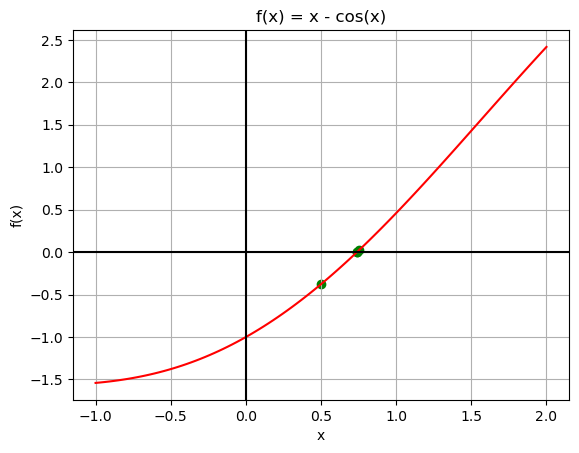

In [66]:
curve(f1_plt, a, b, u1_expr)

The points on the curves represent each iteration until the zero of the function is obtained.

## Equation 2

In [77]:
%%timeit -r 1 -n 1
a, b = raphson(f2, df2, x1=-1.0, x2=0, tol=1.0e-6)

 i     x        f(x)       x1        x2
---  -------   -------   -------   -------
 0:  -0.5000,  +2.6250,  -1.0000,  +0.0000
 1:  -0.7692,  -0.7806,  -1.0000,  -0.5000
 2:  -0.7193,  -0.0281,  -0.7692,  -0.5000
 3:  -0.7173,  -0.0000,  -0.7193,  -0.5000
 4:  -0.7173,  -0.0000,  -0.7173,  -0.5000

Solution:  x = -0.7173,  f(x) = +0.0000

4.19 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


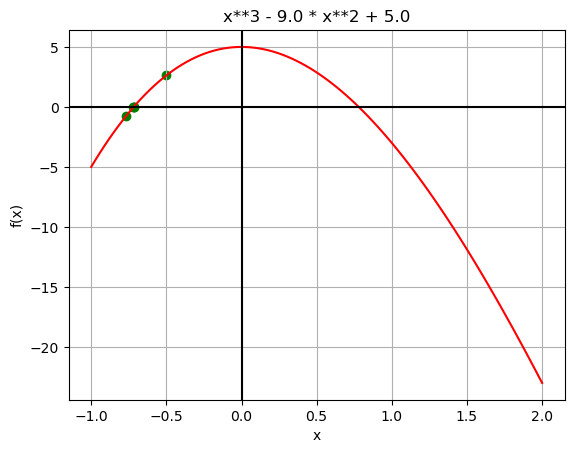

In [37]:
curve(f2_plt, a, b, u2_expr)

The points on the curves represent each iteration until the zero of the function is obtained.

## Equation 3

In [78]:
%%timeit -r 1 -n 1
a, b = raphson(f3, df3, x1=-1.0, x2=2.0, tol=1.0e-6)

 i     x        f(x)       x1        x2
---  -------   -------   -------   -------
 0:  +0.5000,  +0.6875,  -1.0000,  +2.0000
 1:  -0.1111,  -0.1660,  -1.0000,  +0.5000
 2:  +0.0009,  +0.0014,  -0.1111,  +0.5000
 3:  -0.0000,  -0.0000,  -0.1111,  +0.0009

Solution:  x = +0.0000,  f(x) = +0.0000

2.76 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [79]:
%%timeit -r 1 -n 1
a, b = raphson(f3, df3, x1=1.0, x2=2.0, tol=1.0e-6)

 i     x        f(x)       x1        x2
---  -------   -------   -------   -------
 0:  +1.5000,  +0.5625,  +1.0000,  +2.0000
 1:  +1.8000,  -0.2160,  +1.5000,  +2.0000
 2:  +1.7357,  -0.0110,  +1.5000,  +1.8000
 3:  +1.7321,  -0.0000,  +1.5000,  +1.7357
 4:  +1.7321,  -0.0000,  +1.5000,  +1.7321

Solution:  x = +1.7321,  f(x) = +0.0000

4.07 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


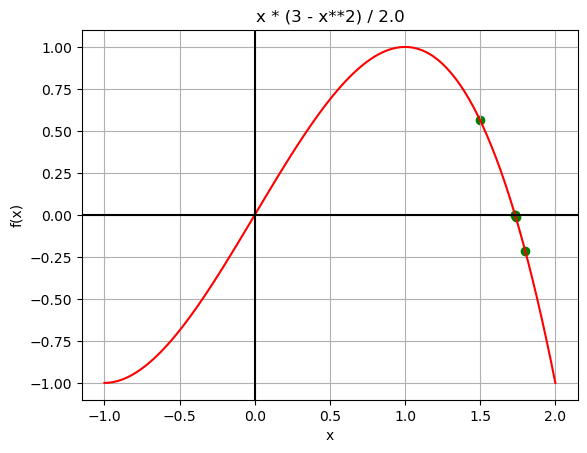

In [40]:
curve(f3_plt, a, b, u3_expr)

The points on the curves represent each iteration until the zero of the function is obtained.

## Equation 4

In [80]:
%%timeit -r 1 -n 1
a, b = raphson(f4, df4, x1=-1.0, x2=2.0, tol=1.0e-6)

 i     x        f(x)       x1        x2
---  -------   -------   -------   -------
 0:  +0.5000,  -0.4784,  -1.0000,  +2.0000
 1:  +1.2500,  -2.7772,  +0.5000,  +2.0000
 2:  +1.6250,  -2.8267,  +1.2500,  +2.0000
 3:  +1.8125,  -2.6011,  +1.6250,  +2.0000
 4:  +1.9062,  -2.4385,  +1.8125,  +2.0000
 5:  +1.9531,  -2.3465,  +1.9062,  +2.0000
 6:  +1.9766,  -2.2980,  +1.9531,  +2.0000
 7:  +1.9883,  -2.2732,  +1.9766,  +2.0000
 8:  +1.9941,  -2.2607,  +1.9883,  +2.0000
 9:  +1.9971,  -2.2544,  +1.9941,  +2.0000
10:  +1.9985,  -2.2512,  +1.9971,  +2.0000
11:  +1.9993,  -2.2496,  +1.9985,  +2.0000
12:  +1.9996,  -2.2488,  +1.9993,  +2.0000
13:  +1.9998,  -2.2484,  +1.9996,  +2.0000
14:  +1.9999,  -2.2482,  +1.9998,  +2.0000
15:  +2.0000,  -2.2481,  +1.9999,  +2.0000
16:  +2.0000,  -2.2481,  +2.0000,  +2.0000
17:  +2.0000,  -2.2481,  +2.0000,  +2.0000
18:  +2.0000,  -2.2481,  +2.0000,  +2.0000
19:  +2.0000,  -2.2481,  +2.0000,  +2.0000

Solution:  x = +2.0000,  f(x) = -2.2480

17 ms ± 0 ns pe

In [81]:
%%timeit -r 1 -n 1
a, b = raphson(f4, df4, x1=-1.0, x2=0.0, tol=1.0e-6)

 i     x        f(x)       x1        x2
---  -------   -------   -------   -------
 0:  -0.5000,  -3.0188,  -1.0000,  +0.0000
 1:  -0.3466,  -0.6788,  -0.5000,  +0.0000
 2:  -0.2863,  -0.0822,  -0.3466,  +0.0000
 3:  -0.2767,  -0.0019,  -0.2863,  +0.0000
 4:  -0.2765,  -0.0000,  -0.2767,  +0.0000

Solution:  x = -0.2765,  f(x) = -0.0000

6.04 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [82]:
%%timeit -r 1 -n 1
a, b = raphson(f4, df4, x1=0.0, x2=1.0, tol=1.0e-6)

 i     x        f(x)       x1        x2
---  -------   -------   -------   -------
 0:  +0.5000,  -0.4784,  +0.0000,  +1.0000
 1:  +0.3883,  -0.0072,  +0.0000,  +0.5000
 2:  +0.3866,  -0.0000,  +0.0000,  +0.3883
 3:  +0.3866,  -0.0000,  +0.0000,  +0.3866

Solution:  x = +0.3866,  f(x) = +0.0000

4.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


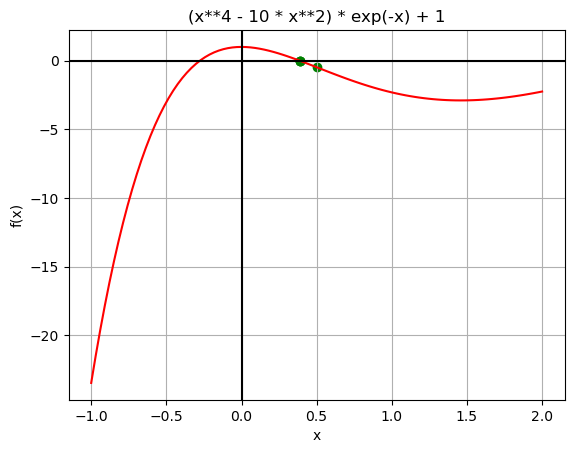

In [44]:
curve(f4_plt, a, b, u4_expr)

The points on the curves represent each iteration until the zero of the function is obtained.

## Equation 5

In [83]:
%%timeit -r 1 -n 1
a, b = raphson(f5, df5, x1=-1.0, x2=2.0, tol=1.0e-6)

 i     x        f(x)       x1        x2
---  -------   -------   -------   -------
 0:  +0.5000,  -1593.7168,  -1.0000,  +2.0000
 1:  +0.7485,  -704.5001,  +0.5000,  +2.0000
 2:  +1.1154,  -307.4690,  +0.7485,  +2.0000
 3:  +1.6375,  -128.6034,  +1.1154,  +2.0000
 4:  +1.8187,  -98.0713,  +1.6375,  +2.0000
 5:  +1.9094,  -85.7249,  +1.8187,  +2.0000
 6:  +1.9547,  -80.1271,  +1.9094,  +2.0000
 7:  +1.9773,  -77.4569,  +1.9547,  +2.0000
 8:  +1.9887,  -76.1522,  +1.9773,  +2.0000
 9:  +1.9943,  -75.5073,  +1.9887,  +2.0000
10:  +1.9972,  -75.1867,  +1.9943,  +2.0000
11:  +1.9986,  -75.0268,  +1.9972,  +2.0000
12:  +1.9993,  -74.9470,  +1.9986,  +2.0000
13:  +1.9996,  -74.9071,  +1.9993,  +2.0000
14:  +1.9998,  -74.8872,  +1.9996,  +2.0000
15:  +1.9999,  -74.8772,  +1.9998,  +2.0000
16:  +2.0000,  -74.8722,  +1.9999,  +2.0000
17:  +2.0000,  -74.8697,  +2.0000,  +2.0000
18:  +2.0000,  -74.8685,  +2.0000,  +2.0000
19:  +2.0000,  -74.8679,  +2.0000,  +2.0000
20:  +2.0000,  -74.8676,  +2.000

/tmp/ipykernel_43856/1484548096.py:16: RuntimeWarning: divide by zero encountered in power
  return (4 * np.pi * x) - (400 * x**-2)


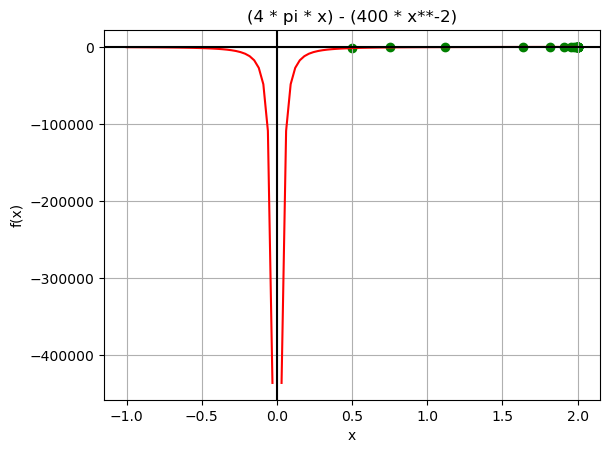

In [46]:
curve(f5_plt, a, b, u5_expr)

The points on the curves represent each iteration until the zero of the function is obtained.

# References

ČERTÍK, O.; MEURER, A. SymPy, library for symbolic  mathematics. [s. d.]. Available at: https://www.sympy.org/en/index.html. Accessed on: 2 Apr. 2023.

KIUSALAAS, J. Numerical Methods in Engineering with Python 3. [S. l.]: Cambridge University Press, 2013.